In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.resnet50 import preprocess_input
from google.colab import files
from google.colab import drive

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.utils import to_categorical

In [ ]:
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.18.0


In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"anujj55","key":"bb336e5788b81d8b89956af1152d84fc"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset

Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset
License(s): copyright-authors
100% 2.69G/2.70G [00:16<00:00, 261MB/s]
100% 2.70G/2.70G [00:16<00:00, 171MB/s]


In [ ]:
!unzip new-plant-diseases-dataset.zip -d plant_disease_data/

Streaming output truncated to the last 5000 lines.
  inflating: plant_disease_data/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/273a7a9e-18be-4b6a-976a-fa5ffd69b731___RS_HL 4366_90deg.JPG  
  inflating: plant_disease_data/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_90deg.JPG  
  inflating: plant_disease_data/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_new30degFlipLR.JPG  
  inflating: plant_disease_data/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665.JPG  
  inflating: plant_disease_data/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls "/content/drive/My Drive/Plant_Disease_Dataset/"

'new plant diseases dataset(augmented)'   new-plant-diseases-dataset.zip
'New Plant Diseases Dataset(Augmented)'   test


In [ ]:
dataset_path = "/content/plant_disease_data/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)"
img_height, img_width = 224, 224

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path, image_size=(img_height, img_width), batch_size=32
)

class_names = train_ds.class_names
print(class_names)

Found 87867 files belonging to 2 classes.
['train', 'valid']


In [ ]:
#image parameters
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_path = dataset_path + "/train"

valid_path = dataset_path + "/valid"

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_path,
    image_size=(img_height, img_width),
    batch_size=BATCH_SIZE
)

Found 70295 files belonging to 38 classes.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    valid_path,
    image_size=(img_height, img_width),
    batch_size=BATCH_SIZE
)

Found 17572 files belonging to 38 classes.


In [ ]:
class_names = train_ds.class_names
num_classes = len(class_names)
print("Class Names:", class_names)

Class Names: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomat

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)

In [ ]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))
base_model.trainable = False

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dense(num_classes, activation='softmax')
])

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
epochs = 5
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/5
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 272s 118ms/step - accuracy: 0.7657 - loss: 1.0171 - val_accuracy: 0.9519 - val_loss: 0.1688
Epoch 2/5
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 270s 97ms/step - accuracy: 0.9646 - loss: 0.1312 - val_accuracy: 0.9679 - val_loss: 0.1064
Epoch 3/5
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 303s 115ms/step - accuracy: 0.9777 - loss: 0.0813 - val_accuracy: 0.9694 - val_loss: 0.0974
Epoch 4/5
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 223s 98ms/step - accuracy: 0.9851 - loss: 0.0581 - val_accuracy: 0.9752 - val_loss: 0.0741
Epoch 5/5
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 261s 97ms/step - accuracy: 0.9895 - loss: 0.0423 - val_accuracy: 0.9776 - val_loss: 0.0669


In [ ]:
model.save("/content/drive/My Drive/Transfer_ResNet50.keras")

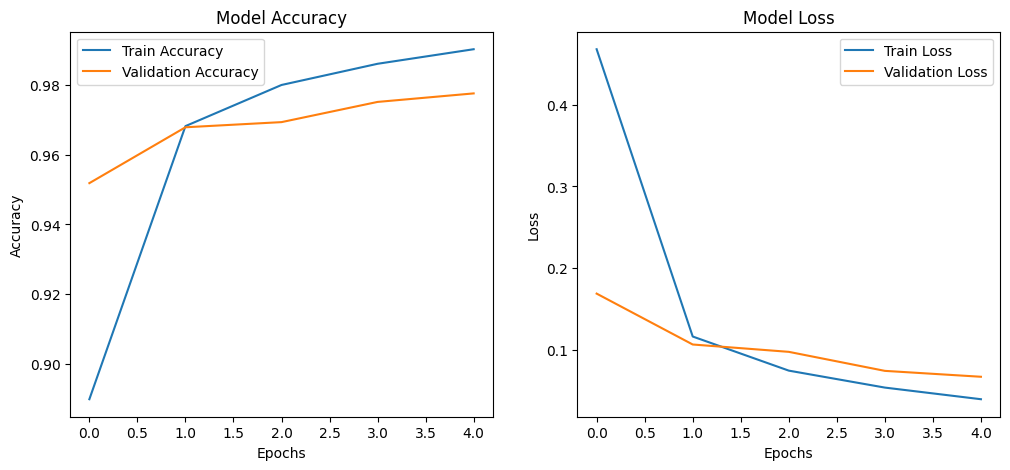

In [ ]:
def plot_training(history):
    plt.figure(figsize=(12, 5))

    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_training(history)

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


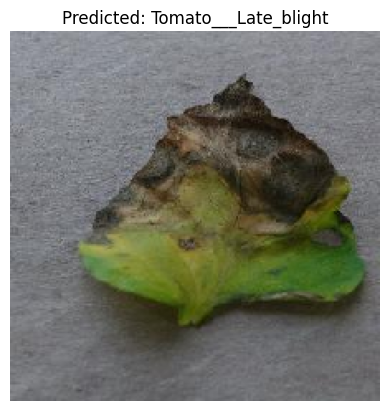

In [ ]:


def predict_image(image_path, model):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(img_height, img_width))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)
    class_index = np.argmax(prediction)

    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Predicted: {class_names[class_index]}')
    plt.show()

predict_image("/content/plant_disease_data/test/test/TomatoEarlyBlight2.JPG", model)

['.config', 'sample_data']
False


In [ ]:

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │           9,766 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,190,644 (96.09 MB)

 Trainable params: 534,310 (2.04 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

 Optimizer params: 1,068,622 (4.08 MB)

In [ ]:
from sklearn.preprocessing import label_binarize

# Parameters
valid_path = "/content/plant_disease_data/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid"
img_height = 224  # Image height
img_width = 224   # Image width
BATCH_SIZE = 32
class_names = ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy',
               'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy',
               'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_',
               'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot',
               'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy',
               'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy',
               'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight',
               'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew',
               'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight',
               'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot',
               'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
               'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    valid_path,
    image_size=(img_height, img_width),
    batch_size=BATCH_SIZE
)

y_true = []
y_pred_probs = []

for images, labels in val_ds:
    y_true.extend(labels.numpy())
    y_pred_probs.extend(model.predict(images))

y_true = np.array(y_true)
y_pred_probs = np.array(y_pred_probs)

y_pred = np.argmax(y_pred_probs, axis=1)

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

y_true_bin = label_binarize(y_true, classes=np.arange(len(class_names)))



Found 17572 files belonging to 38 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10

NameError: name 'roc_curve' is not defined

<ipython-input-51-fbf0a8848d35>:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab10', len(class_names))  # Get distinct colors


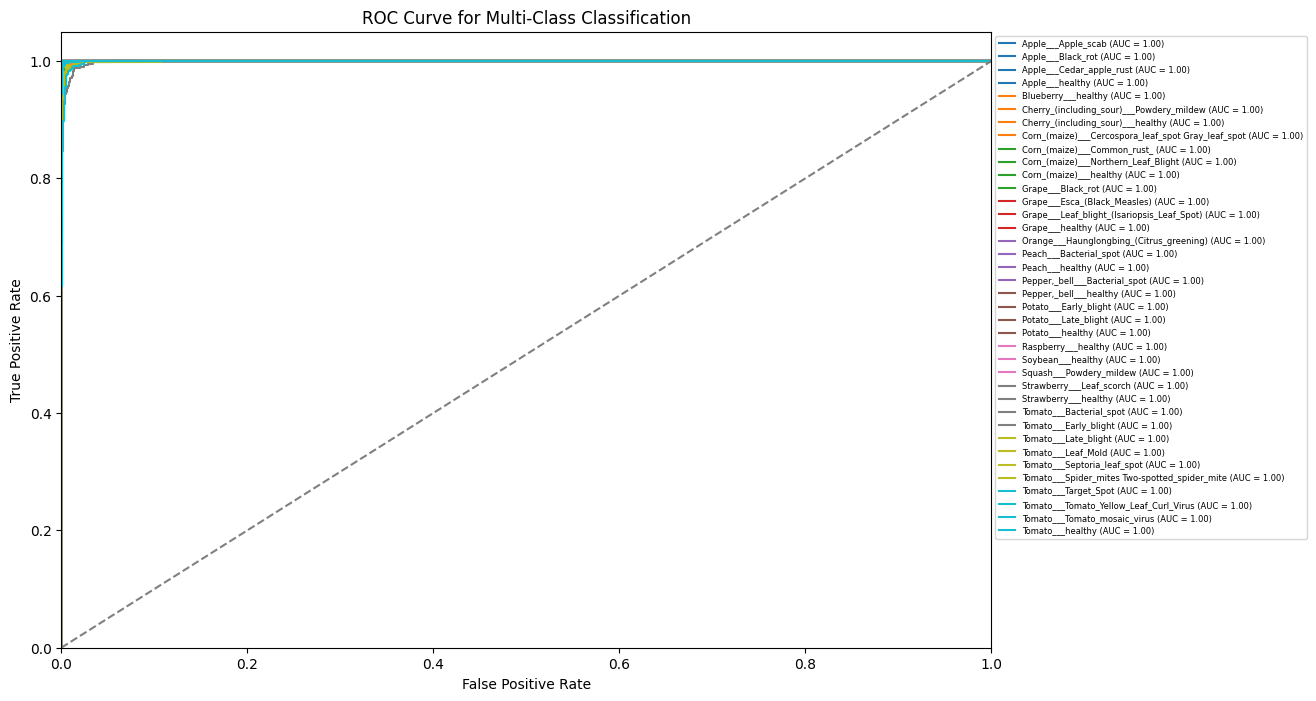

In [ ]:
import numpy as np
import matplotlib.cm as cm

colors = cm.get_cmap('tab10', len(class_names))  # Get distinct colors

plt.figure(figsize=(12, 8))
for i in range(len(class_names)):
    plt.plot(fpr[i], tpr[i], label=f'{class_names[i]} (AUC = {roc_auc[i]:.2f})', color=colors(i))

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Classification')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=6)  # Move legend outside

plt.show()


In [ ]:
print(os.listdir("/content/plant_disease_data/test/test"))


['PotatoEarlyBlight5.JPG', 'TomatoEarlyBlight2.JPG', 'AppleScab2.JPG', 'AppleScab3.JPG', 'TomatoEarlyBlight5.JPG', 'TomatoYellowCurlVirus1.JPG', 'TomatoEarlyBlight3.JPG', 'AppleCedarRust3.JPG', 'CornCommonRust3.JPG', 'PotatoEarlyBlight3.JPG', 'TomatoEarlyBlight4.JPG', 'TomatoEarlyBlight6.JPG', 'TomatoHealthy3.JPG', 'AppleCedarRust2.JPG', 'TomatoHealthy2.JPG', 'AppleScab1.JPG', 'PotatoHealthy1.JPG', 'TomatoYellowCurlVirus2.JPG', 'TomatoHealthy4.JPG', 'TomatoYellowCurlVirus5.JPG', 'AppleCedarRust4.JPG', 'TomatoYellowCurlVirus6.JPG', 'PotatoEarlyBlight1.JPG', 'TomatoHealthy1.JPG', 'PotatoEarlyBlight2.JPG', 'TomatoYellowCurlVirus4.JPG', 'CornCommonRust2.JPG', 'PotatoHealthy2.JPG', 'PotatoEarlyBlight4.JPG', 'TomatoYellowCurlVirus3.JPG', 'CornCommonRust1.JPG', 'AppleCedarRust1.JPG', 'TomatoEarlyBlight1.JPG']
